In [2]:
%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
from pathlib import Path
import numpy as np
import matplotlib.lines as mlines
import matplotlib.cm as cm

In [3]:
root_path = Path("/efs/datasets/users/furlat/v1_results/eval/")
data = {}
for filepath in root_path.glob('*.txt'):
    data[filepath.stem] = np.genfromtxt(filepath.as_posix(), delimiter='\t')
for k in data.keys():
    print(k)

resnet-fix0-imagenet-sketchy-eval-metric-log-accuracy
resnet-fix1-imagenet-hum-eval-metric-log-accuracy
mpath-fix0-imagenet-rand-sketchy-eval-metric-log-accuracy
mpath-fix0-imagenet-rand-hum-eval-metric-log-accuracy
mpath-fix1-imagenet-rand-sketchy-eval-metric-log-accuracy
mpath-fix1-imagenet-imagenet-hum-eval-metric-log-accuracy
mpath-fix1-imagenet-rand-hum-eval-metric-log-accuracy
mpath-fix1-imagenet-imagenet-sketchy-eval-metric-log-accuracy
resnet-fix0-rand-hum-eval-metric-log-accuracy
resnet-fix0-imagenet-hum-eval-metric-log-accuracy
resnet-fix0-rand-sketchy-eval-metric-log-accuracy
resnet-fix1-imagenet-sketchy-eval-metric-log-accuracy


In [4]:
def plot_data(data, ax):
    colours = cm.rainbow(np.linspace(0, 1, len(list(data.keys()))))
    min_index, min_value = 0, 1000
    for i, (name, array) in enumerate(data.items()):
        x = np.insert(array[:, 0], 0, 0)
        current_min = np.min(1 - array[:, 2])
        if current_min < min_value:
            min_index, min_value = i, current_min

        ax.plot(x, 1 - np.insert(array[:, 1], 0, 0), '--', color=colours[i])
        ax.plot(x, 1 - np.insert(array[:, 2], 0, 0), '-', color=colours[i], label=name)
        
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Error')
    ax.axhline(y=min_value, color=colours[min_index])

    # bbox_to_anchor = (x_position, y_position)
    # left=0, right=1, top=1, bottom=0
    ax_legend = ax.legend(bbox_to_anchor=(0.15, 0.35),
                          loc=3,
                          ncol=1,
                          mode="expand",
                          borderaxespad=0.)
    
    # Add the legend for training and validation
    ax_val = mlines.Line2D([], [], color='k', linestyle='--', label='Training')
    ax_train = mlines.Line2D([], [], color='k', linestyle='-', label='Validation')
    ax.legend(handles=[ax_val, ax_train])
    
    plt.gca().add_artist(ax_legend)
    fig.savefig('samplefigure', bbox_extra_artists=(ax_legend,), bbox_inches='tight')

    return ax

def filter_by_keyword(data, keywords, plot=True):
    def filter(k, keywords):
        """Returns True if any of the keywords is in k
        
        Parameters
        ----------
        k : str
            keyword
        keywords : str list
            list of keyword that have to be in k
            
        Returns
        -------
        bool
        """
        return all([keyword in k for keyword in keywords])
    
    def clean(name, keywords):
        for keyword in keywords:
            name = name.replace(keyword+'-', '')
        return name
    
    data = {clean(k, keywords):v for (k, v) in data.items() if filter(k, keywords)}
    if plot:
        fig = plt.figure(figsize=(7, 4))
        ax = fig.add_subplot(111)
        ax1 = plot_data(data, ax)

<IPython.core.display.Javascript object>


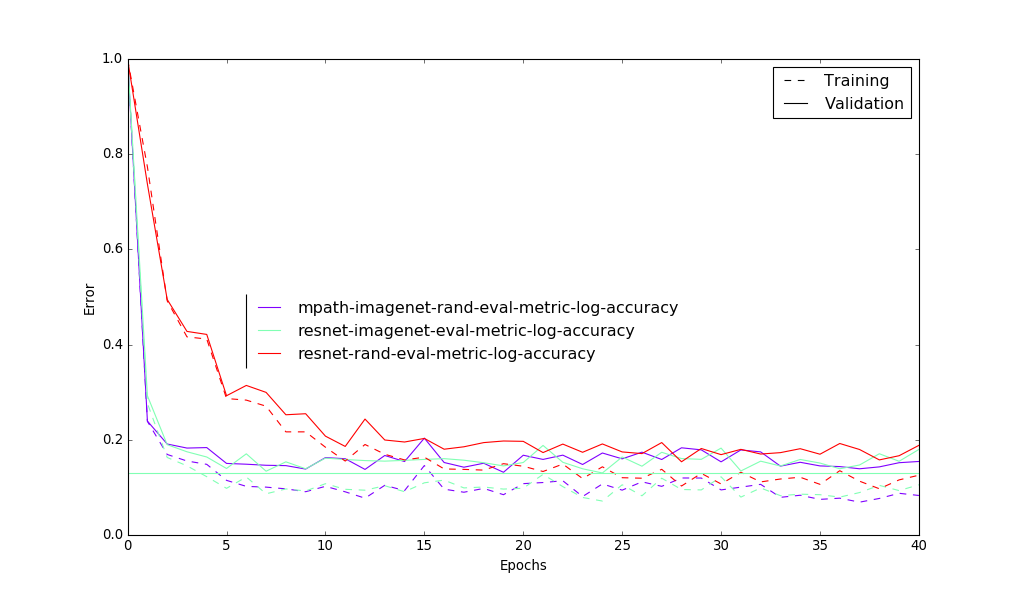

NameError: global name 'fig' is not defined

In [8]:
filter_by_keyword(data, ['sketchy','fix0'])

<IPython.core.display.Javascript object>


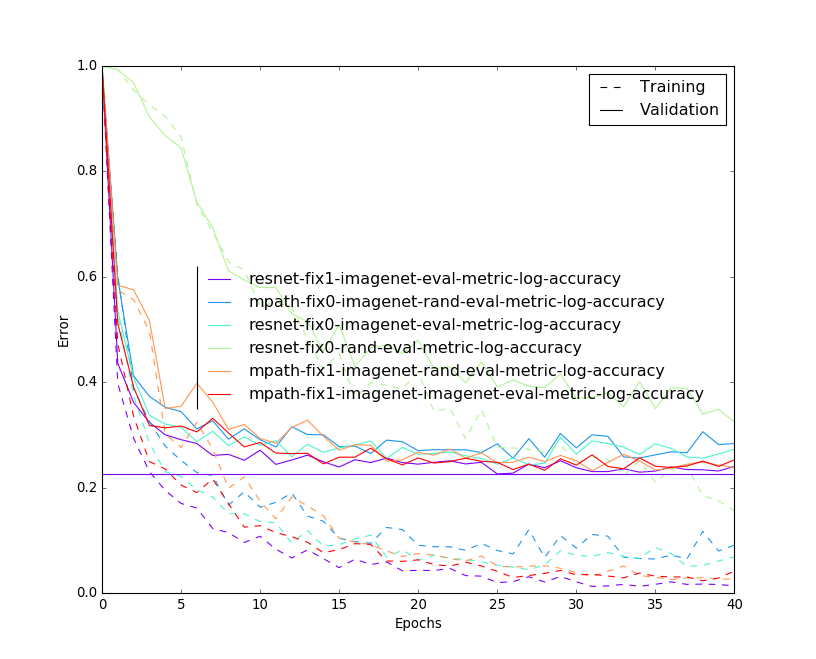

NameError: global name 'fig' is not defined

In [6]:
filter_by_keyword(data, ['hum'])